In [42]:
#Add matplotlib inline magic command

%matplotlib inline

#import dependencies 

import matplotlib.pyplot as plt

import pandas as pd

import os

# join csv and read


city_data=os.path.join("Resources","city_data.csv")
ride_data=os.path.join("Resources","ride_data.csv")


city_df=pd.read_csv(city_data)
ride_df=pd.read_csv(ride_data)


city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [43]:
# use count() to find names of columns
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [44]:
# check for any NaN data
city_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [45]:
#get data types

city_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [46]:
# use unique() to return an array or list of the unique values of the column

city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [47]:
# find sum of Surburban and Rural
sum(city_df["type"]=="Urban")
sum(city_df["type"]=="Rural")
sum(city_df["type"]=="Suburban")
            

36

In [48]:
# Inspect Ride Data DataFrame

# Get the columns and the rows that are not null

ride_df.count()

#find isna()

ride_df.isna().sum()

#get data types of each columns

ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [49]:
## merging the DataFrames

#combine the data into a single data set

pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
                                                   
pyber_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
# creating bubble chart
# 1. get the average fare using mean() for each city
# 2. get total number of rides for each city, using count()
# 3. to get bubble size correlate to nmber of drivers get the average driver_count

## create urban city DataFrame
## this will only give DataFrame that contains only cities with Urban type
urbanC_df=pyber_df[pyber_df["type"]=="Urban"]

urbanC_df.head(5)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [51]:
#create DataFrame for Suburban

suburbanC_df=pyber_df[pyber_df["type"]=="Suburban"]

suburbanC_df.head(5)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [52]:
#create DataFrame for Rural

ruralC_df=pyber_df[pyber_df["type"]=="Rural"]

ruralC_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [53]:
# get the number of rides for urban cities

urban_ride_count=urbanC_df.groupby(["city"]).count()["ride_id"]

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [54]:
# get the number of rides for suburban cities

suburban_ride_count=suburbanC_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head(5)

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [55]:
#create the number of rides for rural cities

rural_ride_count=ruralC_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head(5)

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [56]:
## calculate the average fare for each city: Urban, Suburban and Rural
## using the groupby() and mean()

#get the average fare for urban cities

urban_avg_fare=urbanC_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [57]:
# get the average fare for suburban cities

suburban_avg_fare=suburbanC_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [58]:
# get the average fare for rural cities

rural_avg_fare=ruralC_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head(5)

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [59]:
#get the number of average drivers(driver_count) for each city: Urban, Suburban, and Rural

urban_avg_driver=urbanC_df.groupby(["city"]).mean()["driver_count"]

urban_avg_driver

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [60]:
# get the average for driver_count for suburban

suburban_avg_driver=suburbanC_df.groupby(["city"]).mean()["driver_count"]

suburban_avg_driver.head(5)

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [61]:
# get the average for driver_count in rural

rural_avg_driver=ruralC_df.groupby(["city"]).mean()["driver_count"]

rural_avg_driver.head(5)

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

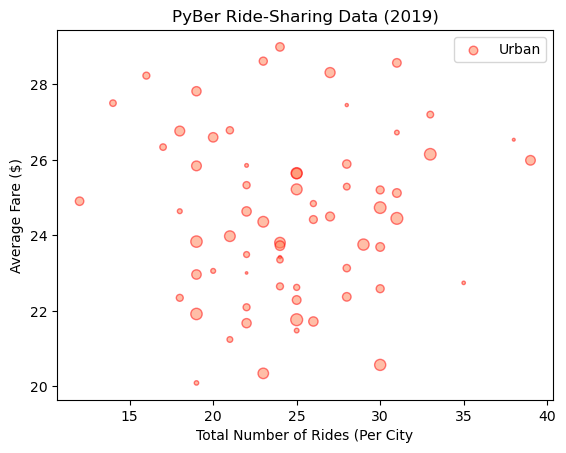

In [62]:
# Create the bubble chart for average fare and average ride for each city,
## y -axis = fare x-axis= rides


plt.scatter(urban_ride_count,urban_avg_fare,s=urban_avg_driver,
           color="coral",linewidths=1, label="Urban",alpha=.5, edgecolor="red")
# add labels
plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City")
# add legend
plt.legend()

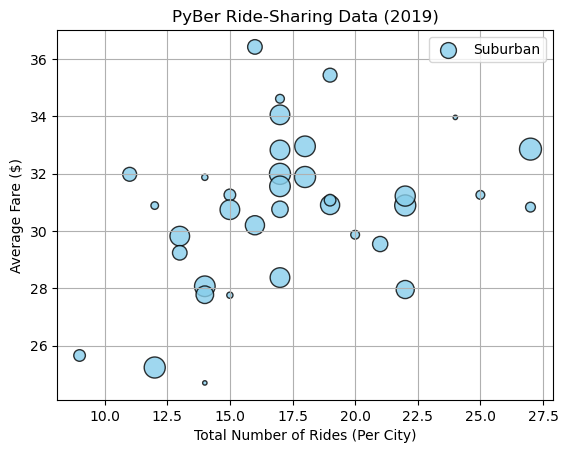

In [63]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

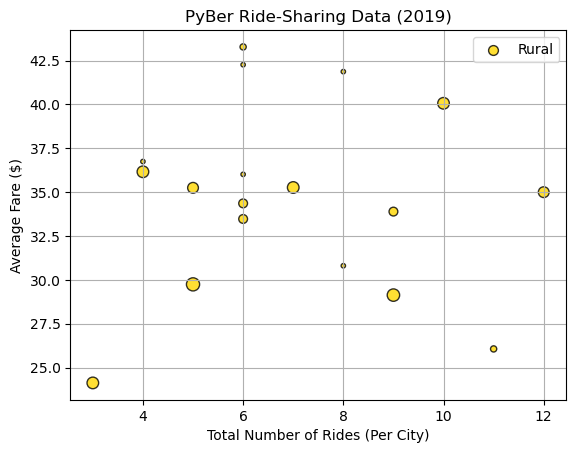

In [64]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

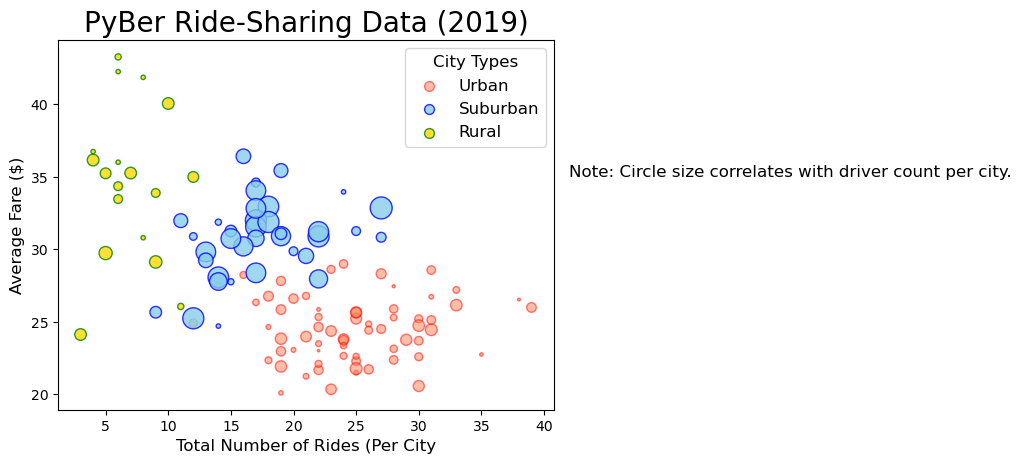

In [89]:
## combine all the scatter plots together

plt.scatter(urban_ride_count,urban_avg_fare,s=urban_avg_driver,
           color="coral",linewidths=1, label="Urban",alpha=.5, edgecolor="red")




plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="blue", linewidths=1,
      alpha=0.8, label="Suburban")
            

            
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="green", linewidths=1,
      alpha=0.8, label="Rural")
            
# add the labels and titels

plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)

plt.ylabel("Average Fare ($)",fontsize=12)

plt.xlabel("Total Number of Rides (Per City",fontsize=12)
# add legend

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.get_title().set_fontsize(12)



# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the PNG

plt.savefig("./Fig1.png")